In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import tensorflow as tf

import h5py

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.utils import to_categorical

In [31]:
def feature_normalize(dataset):

    mu = np.mean(dataset)
    sigma = np.std(dataset)
    
    return (dataset - mu) / sigma

In [32]:
def get_class_data(class_name):
    global class_counts
    
    path = os.path.join(train_path, class_name)
    class_units = np.fromfile(path, dtype=int, count=-1, sep=' ', offset=0)
    units = np.split(class_units, class_units.size // 1080, 0) # 1080 = 3 sec * 360Hz
    class_counts[class_name] = class_units.size // 1080
   
    return units

In [33]:
base_path = 'C:\\Users\\Professional\\Desktop\\1studing\\CourseWork3\\course_work_app\\Course_work\\cnn_code_4_classes'
model_save_path = os.path.join(base_path, 'model_temp\\cnn_model.h5') 
model_weights_path = os.path.join(base_path, 'model_temp\\cnn_model_weights.hdf5')
train_path = os.path.join(base_path, 'data_files_train_4')

classes = ['N', 'RBBB', 'B', 'AFIB']
class_mapping = {'N': 0, 'RBBB': 1, 'B': 2, 'AFIB': 3}
class_counts = {'N': 0, 'RBBB': 0, 'B': 0, 'AFIB': 0}

X_train = [] # data - each unit 3 sec - 1080 values
Y_train = [] #labels - from class_mapping

for class_i in classes:
    class_units = get_class_data(class_i)
    Y_train  += [class_mapping[class_i]] * class_counts[class_i]
    X_train += class_units

print(len(X_train)) 
print(len(Y_train)) 

#print(X_train)

2053
2053


In [92]:
TIME_PERIODS = 1080

num_classes = 4
input_shape = None

model = Sequential()
model.add(Reshape((TIME_PERIODS, 1), input_shape=(input_shape,)))  
model.add(Conv1D(50, 3, activation='relu', input_shape=(TIME_PERIODS, 1)))
model.add(GlobalMaxPooling1D())
#model.add(Dropout(0.5))
#model.add(MaxPooling1D(3))
#model.add(Conv1D(65, 3, activation='relu'))
#model.add(Conv1D(50, 135, activation='relu'))
#model.add(GlobalAveragePooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.save(model_save_path)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_44 (Reshape)         (None, 1080, 1)           0         
_________________________________________________________________
conv1d_136 (Conv1D)          (None, 1078, 50)          200       
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 50)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_35 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 204       
Total params: 2,954
Trainable params: 2,954
Non-trainable params: 0
___________________________________________________


--- Fit the model ---

Train on 2053 samples
Epoch 1/5
2053/2053 [==============================] - 4s 2ms/sample - loss: 1.3724 - accuracy: 0.3794
Epoch 2/5
2053/2053 [==============================] - 3s 1ms/sample - loss: 1.2155 - accuracy: 0.5129
Epoch 3/5
2053/2053 [==============================] - 3s 2ms/sample - loss: 1.1154 - accuracy: 0.5801
Epoch 4/5
2053/2053 [==============================] - 3s 2ms/sample - loss: 1.0343 - accuracy: 0.6215
Epoch 5/5
2053/2053 [==============================] - 3s 1ms/sample - loss: 0.9673 - accuracy: 0.6425

--- Learning curve of model training ---



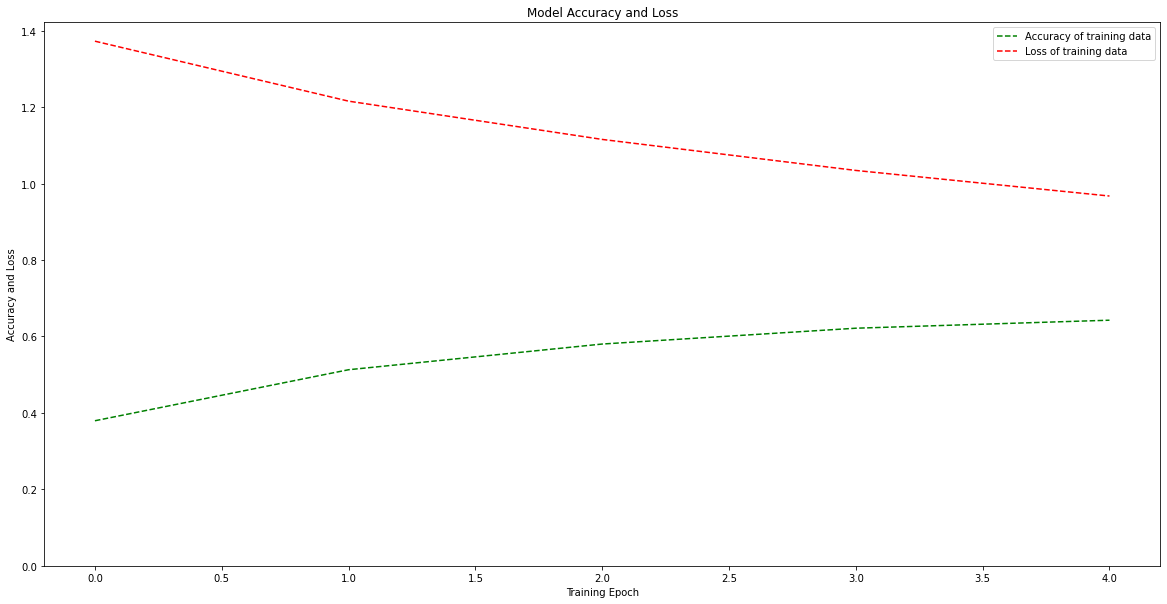

In [93]:
XX_train = np.asarray(X_train)
YY_train = np.asarray(Y_train)
XX_train = XX_train.astype("float32")
YY_train = YY_train.astype("float32")

XXX_train = feature_normalize(XX_train)

YYY_train = to_categorical(YY_train, num_classes)

print("\n--- Fit the model ---\n")

# Hyper-parameters
BATCH_SIZE = 32
EPOCHS = 5

history = model.fit(XXX_train,
                      YYY_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1)  

model.save_weights(model_weights_path)


print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(20, 10)) 
plt.plot(history.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()